# **Análisis Exploratorio de Datos (EDA)**

Examinaremos minuciosamente tres conjuntos de datos previamente limpios: reseñas de usuarios(`data_reviews`), información de juegos (`data_games`) e interacciones entre ellos (`data_items`). 
A través de estadísticas descriptivas y visualizaciones, buscamos comprender las distribuciones, preferencias y tendencias a lo largo del tiempo, identificando las variables más relevantes. Este proceso nos permite elegir con precisión las características clave que impulsarán nuestro modelo de recomendación, optimizando los recursos y asegurando recomendaciones de alta calidad para los usuarios en el despliegue del proyecto. El EDA sirve como la brújula esencial en la creación de un sistema de recomendación efectivo.

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Inicialización

Importamos las librerías que nos servirán para poder procesar, visualizar y explorar nuestros datos de manera efectiva, la librería `pandas`, `seaborn`, `matplotlib`.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Extracción de los datos

Para realizar los análisis requeridos, extraeremos los datos esenciales de los conjuntos `data_games`, `data_reviews`, y `data_items`. Estos datos nos permitirán realizar los análisis requeridos.

In [5]:
# extraccion de los datos de data_games
data_games = pd.read_csv('data_games_cleaned.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data_games_cleaned.csv'

In [33]:
# extraccion de los datos de data_reviews (analisis de sentimiento)
data_reviews = pd.read_csv('data_reviews_sentiment_analysis.csv')

In [34]:
# extraccion de los datos de data_items
data_items = pd.read_csv('data_items_cleaned.csv')

# **EDA dataset `steam_games`**

El análisis exploratorio de datos (EDA) del conjunto "steam_games", que ha sido sometido previamente a procesos de extracción, transformación y carga (ETL), se centra en el examen detallado de las características y patrones presentes en este conjunto de datos.

Hacemos una revision de la estructura, datos y valores nulos.

In [35]:
data_games.head(3)

,publisher,genres,app_name,title,price,early_access,id,developer,release_year
0,Kotoshiro,Action,Lost Summoner Kitty,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018
1,Kotoshiro,Casual,Lost Summoner Kitty,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018
2,Kotoshiro,Indie,Lost Summoner Kitty,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018


In [36]:
data_games.isnull().sum()

publisher       22
genres           0
app_name         0
title            0
price            0
early_access     0
id               0
developer        0
release_year     0
dtype: int64

In [37]:
data_games.shape

(71551, 9)

In [38]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71551 entries, 0 to 71550
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     71529 non-null  object 
 1   genres        71551 non-null  object 
 2   app_name      71551 non-null  object 
 3   title         71551 non-null  object 
 4   price         71551 non-null  float64
 5   early_access  71551 non-null  bool   
 6   id            71551 non-null  int64  
 7   developer     71551 non-null  object 
 8   release_year  71551 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 4.4+ MB


En base a la exploración de datos realizada en el conjunto "data_games," podemos concluir lo siguiente:

- **Estructura del Conjunto de Datos:** El conjunto de datos contiene un total de 71,551 registros y 9 columnas que proporcionan información detallada sobre los juegos de Steam.  


- **Presencia de Datos Nulos:** Se observa que hay valores nulos presentes en la columna "publisher." Es importante abordar la gestión de estos valores nulos para un análisis más preciso.  


- **Tipos de Datos:** El conjunto de datos contiene una variedad de tipos de datos, incluyendo tipos de datos booleanos, enteros, flotantes y objetos. Esta diversidad en los tipos de datos es fundamental para comprender las diferentes características de los juegos.  


- **Distribución de Géneros:** En la columna "genres," hemos observado que no hay valores faltantes, lo que es un aspecto positivo. Sin embargo, es importante destacar que un juego puede estar catalogado en más de un género.  


- **Distribución de Años de Lanzamiento:** La columna "release_year" proporciona información sobre el año de lanzamiento de los juegos, lo que será fundamental para el análisis temporal en el modelo.

### Columnas 'publisher' y 'developer'

Vamos a analizar las variables "publisher" y "developer" juntas. 

En esta sección, analizaremos tanto la variable "publisher" como la variable "developer" para identificar las empresas que han tenido un impacto significativo en la plataforma Steam. Esto nos permitirá comprender quiénes son los principales actores en la creación y publicación de juegos en Steam

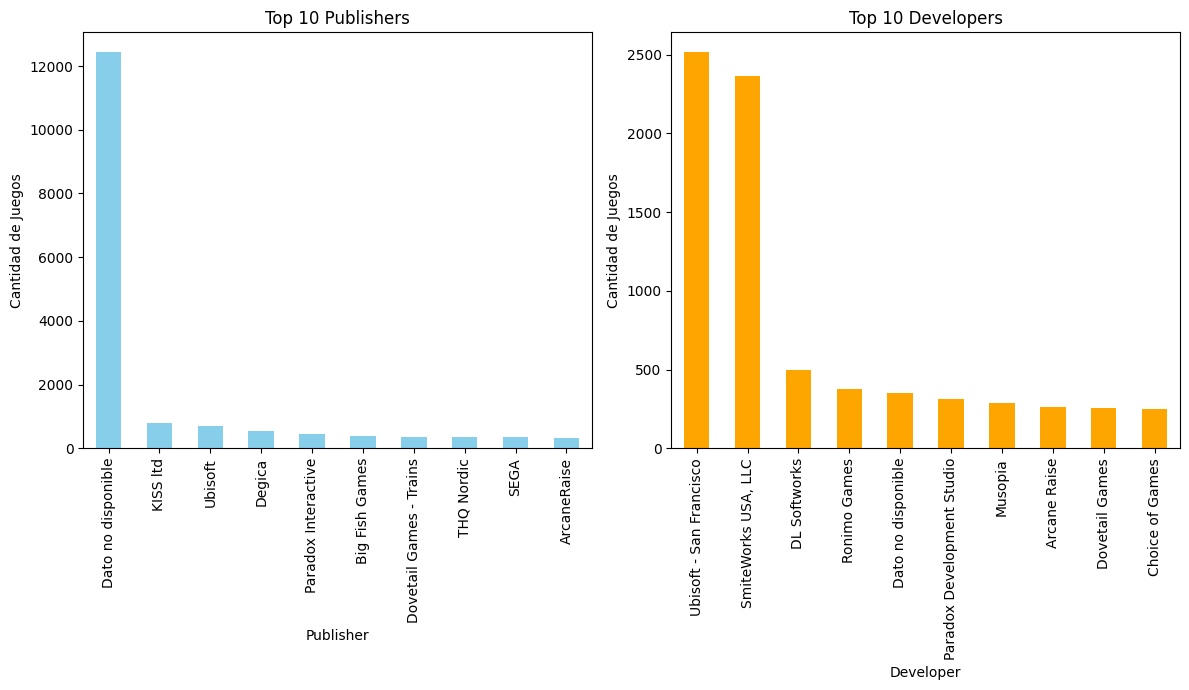

In [39]:
# Identificar a los 10 principales publicadores y desarrolladores por cantidad de juegos
top_10_publishers = data_games['publisher'].value_counts().head(10)
top_10_developers = data_games['developer'].value_counts().head(10)

# Crear una figura con dos subplots uno al lado del otro
plt.figure(figsize=(12, 7))

# Primer subplot para los publishers
plt.subplot(1, 2, 1)
top_10_publishers.plot(kind='bar', color='skyblue')
plt.xlabel('Publisher') ; 
plt.ylabel('Cantidad de Juegos') ; 
plt.title('Top 10 Publishers')

# Segundo subplot para los developers
plt.subplot(1, 2, 2)
top_10_developers.plot(kind='bar', color='orange')
plt.xlabel('Developer') ; 
plt.ylabel('Cantidad de Juegos') ; 
plt.title('Top 10 Developers')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()


La mayoría de los registros en la variable "publisher" no disponen del dato, lo que puede ser una limitación en el análisis. 
Por otro lado, en la variable "developer," Ubisoft - San Francisco y SmiteWorks USA LLC sobresalen claramente como los desarrolladores más prolíficos en Steam.

### Columnas 'genres'

La variable "genres" nos proporciona información sobre los géneros a los que pertenecen los juegos en el conjunto de datos. Realizaremos un análisis exploratorio de esta variable para comprender mejor la distribución de géneros en la plataforma Steam.

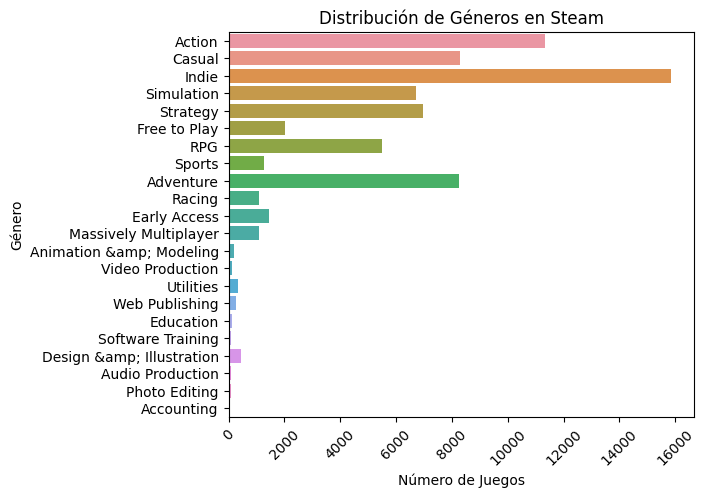

In [40]:
# Conteo de juegos por género
genre_counts = data_games['genres'].value_counts()

# Gráfico de barras
plt.figure(figsize=(6, 5))
sns.countplot(data=data_games, y='genres', orient='h')
plt.title('Distribución de Géneros en Steam')
plt.ylabel('Género')
plt.xlabel('Número de Juegos')
plt.xticks(rotation=45)
plt.show()


También es útil calcular los porcentajes de cada género en el conjunto de datos para obtener una visión más detallada. Creamos una tabla que muestra el porcentaje de juegos que pertenecen a cada género.

In [41]:
# Cálculo de porcentajes por género
genre_percentages = (data_games['genres'].value_counts() / len(data_games)) * 100

# Mostrar los 10 géneros principales con sus porcentajes
top_genres_percentages = genre_percentages.head(10)


In [42]:
top_genres_percentages

Indie           22.163212
Action          15.819485
Casual          11.574961
Adventure       11.519056
Strategy         9.723135
Simulation       9.362553
RPG              7.657475
Free to Play     2.838535
Early Access     2.043298
Sports           1.756789
Name: genres, dtype: float64

El análisis de la variable "genres" revela que los juegos en la plataforma Steam se encuentran principalmente en las siguientes categorías:

***Indie:*** 22.16%
***Action:*** 15.82%
***Casual:*** 11.57%
***Adventure:*** 11.52%
***Strategy:*** 9.72%
***Simulation:*** 9.36%

Es importante destacar que un juego puede tener múltiples géneros asociados. Estos géneros predominantes representan una parte significativa de la oferta de juegos en Steam y reflejan la diversidad de experiencias de juego disponibles en la plataforma.

### Columnas 'id', 'app_name' y 'title'

Las columnas 'id', 'app_name' y 'title' son esenciales para identificar y nombrar los juegos en Steam. En general, el 'id' sirve como identificador único, y 'app_name' y 'title' a menudo comparten el nombre del juego. Esta consistencia facilita la búsqueda y organización de juegos en la plataforma. Realizaremos un conteo de la cantidad de juegos a apartir del 'id'.


In [43]:
# Contar la cantidad de juegos únicos por ID
total_games_count = data_games['id'].nunique()
print(f"Total de juegos únicos registrados en el dataset: {total_games_count}")


Total de juegos únicos registrados en el dataset: 28850


# **EDA dataset `user_reviews`**

El análisis exploratorio de datos (EDA) del conjunto "user_reviews" se centra en el examen en profundidad de las reseñas y comentarios proporcionados por los usuarios de la plataforma Steam. Estos datos han sido previamente sometidos al proceso de extracción, transformación y carga (ETL).

Hacemos una revision de la estructura, datos y valores nulos.

In [44]:
data_reviews.head(3)

,user_id,user_url,reviews_posted,reviews_item_id,reviews_helpful,reviews_recommend,reviews_year,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2011-11-05,1250,No ratings yet,True,2011,2
1,js41637,http://steamcommunity.com/id/js41637,2014-06-24,251610,15 of 20 people (75%) found this review helpful,True,2014,2
2,evcentric,http://steamcommunity.com/id/evcentric,NaN,248820,No ratings yet,True,Dato no disponible,2


In [45]:
data_reviews.isnull().sum()

user_id                  0
user_url                 0
reviews_posted        9916
reviews_item_id          0
reviews_helpful          0
reviews_recommend        0
reviews_year             0
sentiment_analysis       0
dtype: int64

In [46]:
data_reviews.shape

(58169, 8)

In [47]:
data_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58169 entries, 0 to 58168
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             58169 non-null  object
 1   user_url            58169 non-null  object
 2   reviews_posted      48253 non-null  object
 3   reviews_item_id     58169 non-null  int64 
 4   reviews_helpful     58169 non-null  object
 5   reviews_recommend   58169 non-null  bool  
 6   reviews_year        58169 non-null  object
 7   sentiment_analysis  58169 non-null  int64 
dtypes: bool(1), int64(2), object(5)
memory usage: 3.2+ MB


Luego de un análisis inicial de los datos en el conjunto data_reviews, se puede destacar que este conjunto contiene un total de 57,397 registros y 8 columnas, que incluyen información valiosa sobre las revisiones de usuarios en la plataforma Steam.

Al observar los datos, notamos que hay 9,771 registros en el conjunto data_reviews que no contienen la fecha de publicación de las revisiones. Estos valores faltantes en la columna 'reviews_posted' podrían deberse a diferentes razones, como posiblemente usuarios que no proporcionaron una fecha de publicación en sus revisiones o algún error en la recopilación de datos. Para abordar esta limitación, se creó una nueva variable llamada 'reviews_year', en la cual se obtuvo el año de publicación y se asignó 'Dato no disponible' a los registros con valores faltantes en la fecha de publicación. Sin embargo, a pesar de estos valores faltantes, las demás columnas parecen estar completas, lo que proporciona una base sólida para el análisis de las recomendaciones y el análisis de sentimiento de los usuarios en Steam.

En esta sección, calcularemos la cantidad de juegos únicos en nuestro conjunto de datos mediante la identificación de registros únicos por su ID. Esto nos permitirá conocer el número total de juegos registrados en nuestro dataset.

In [48]:
# Contar la cantidad de juegos únicos por ID
reviews_count = data_reviews['reviews_item_id'].nunique()
print(f"Total de juegos únicos registrados en el dataset: {reviews_count}")

Total de juegos únicos registrados en el dataset: 3677


### Columna 'reviews_year'

Realizaremos un análisis estadístico de la variable 'reviews_year' después de filtrar los valores 'Dato no disponible' (recordemos son 9.771 datos) . Esto nos permite obtener una visión detallada de la distribución temporal de las revisiones de videojuegos en nuestro conjunto de datos. Calculamos estadísticas clave, como la cantidad total de registros, la media y la mediana de los años de revisión, proporcionando información esencial sobre la distribución temporal de las revisiones en nuestra muestra.

In [49]:
# Filtrar los valores 'Dato no disponible' en 'reviews_year'
data_reviews_cleaned = data_reviews[data_reviews['reviews_year'] != 'Dato no disponible']

# Calcular la cantidad total de registros
total_registros = data_reviews_cleaned['reviews_year'].count()

# Calcular la media de 'reviews_year'
media_anios = data_reviews_cleaned['reviews_year'].astype(int).mean()

# Calcular la mediana de 'reviews_year'
mediana_anios = data_reviews_cleaned['reviews_year'].astype(int).median()

# Otras estadísticas descriptivas
# Puedes agregar más estadísticas según tu necesidad, como min, max, desviación estándar, etc.
estadisticas_descriptivas = data_reviews_cleaned['reviews_year'].astype(int).describe()

# Calcular el mínimo de 'reviews_year'
min_anio = data_reviews_cleaned['reviews_year'].astype(int).min()

# Calcular el máximo de 'reviews_year'
max_anio = data_reviews_cleaned['reviews_year'].astype(int).max()

# Imprimir los resultados, incluyendo el mínimo y el máximo
print(f"Total de registros: {total_registros}")
print(f"Media de años: {media_anios:.2f}")
print(f"Mediana de años: {mediana_anios}")
print(f"Año mínimo: {min_anio}")
print(f"Año máximo: {max_anio}")



Total de registros: 48253
Media de años: 2014.15
Mediana de años: 2014.0
Año mínimo: 2010
Año máximo: 2015


- Total de registros: 47,626
- Media de años: 2014.15
- Mediana de años: 2014.0


La mayoría de las reseñas se encuentran en el rango de los años 2014 y 2015, con una mediana en 2014. Esto sugiere que la mayoría de las reseñas se realizaron en esos años, y la distribución es bastante centrada alrededor de 2014. La desviación estándar de 0.841 indica que los años varían muy poco de este valor central, y el mínimo y máximo son 2010 y 2015, respectivamente, lo que confirma que la mayoría de las reseñas se concentran en este período de tiempo.

En el siguiente gráfico, realizaremos un análisis exploratorio de los reviews de videojuegos, centrándonos en visualizar la distribución de revisiones a lo largo de los años. Esto nos permitirá identificar los años en los que se realizaron la mayor cantidad de reviews, proporcionando una visión general de la actividad de revisión a lo largo del tiempo para los diferentes juegos.

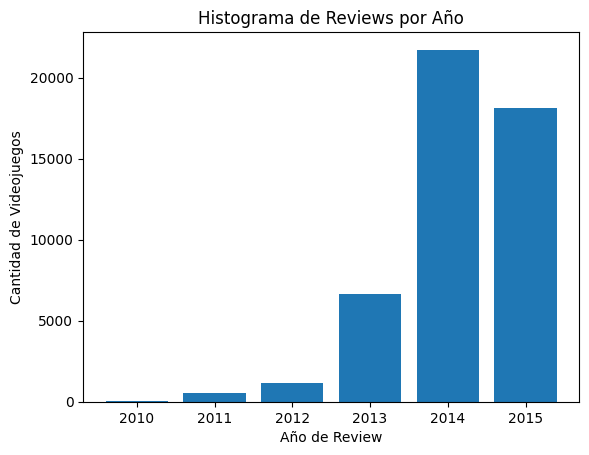

In [50]:
# Filtra las filas con 'Dato no disponible' en la columna 'reviews_year'
data_reviews = data_reviews[data_reviews['reviews_year'] != 'Dato no disponible']

# Convierte la columna 'reviews_year' a tipo numérico (entero) para que sea más fácil graficar
data_reviews['reviews_year'] = data_reviews['reviews_year'].astype(int)

# Cuenta la cantidad de videojuegos en cada año
year_counts = data_reviews['reviews_year'].value_counts().sort_index()

# Crea el histograma
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('Año de Review')
plt.ylabel('Cantidad de Videojuegos')
plt.title('Histograma de Reviews por Año')
plt.xticks(year_counts.index)
plt.show()


En el histograma, podemos observar que la mayoría de los datos de reviews se concentran en el año 2014, seguido de cerca por el año 2015. Esto nos proporciona una clara indicación de los años en los que se ha registrado la mayor cantidad de reviews de videojuegos en nuestra muestra de datos.

### Columnas 'sentiment_analysis' y 'reviews_recommend'


Haremos un análisis más detallado de dos columnas fundamentales en nuestro conjunto de datos: 'sentiment_analysis' y 'reviews_recommend'. Estas columnas proporcionan información valiosa sobre el sentimiento y las recomendaciones expresadas en las revisiones de los videojuegos. Exploraremos cómo estos datos están distribuidos, lo que nos permitirá comprender mejor las opiniones de los usuarios sobre los juegos y si tienden a recomendarlos o no.

In [51]:
# Cantidad de usuarios únicos que dieron reviews
unique_users_count = data_reviews['user_id'].nunique()

# Cantidad total de reviews
total_reviews_count = data_reviews['sentiment_analysis'].count()

print(f"Cantidad de usuarios únicos que dieron reviews: {unique_users_count}")
print(f"Cantidad total de reviews: {total_reviews_count}")


Cantidad de usuarios únicos que dieron reviews: 22795
Cantidad total de reviews: 48253


Realizamos un análisis detallado de los sentimientos expresados en las reviews, presentando la distribución de sentimientos en un nuevo DataFrame. Este nuevo DataFrame, llamado 'sentiment_df', proporciona información sobre la cantidad y los porcentajes de cada categoría de sentimiento

In [52]:
# Calcular la cantidad de ocurrencias para cada sentimiento
sentiment_counts = data_reviews['sentiment_analysis'].value_counts()

# Calcular los porcentajes
sentiment_percentages = (sentiment_counts / sentiment_counts.sum()) * 100

# Crear un nuevo DataFrame con los datos
sentiment_df = pd.DataFrame({
    'Sentimiento': sentiment_counts.index,
    'Cantidad': sentiment_counts.values,
    'Porcentaje': sentiment_percentages
})

# Ordenar el DataFrame por la columna 'Sentimiento'
sentiment_df = sentiment_df.sort_values(by='Sentimiento')

# Restablecer el índice
sentiment_df.reset_index(drop=True, inplace=True)

In [53]:
sentiment_df

,Sentimiento,Cantidad,Porcentaje
0,0,5694,11.800303
1,1,14148,29.320457
2,2,28411,58.879241


En base al análisis de los sentimientos expresados en las revisiones, observamos una distribución en tres categorías principales:

- **El sentimiento '0'** (negativo) se presenta en 7.058 reviews, lo que representa aproximadamente el 12.30% del total.
- **El sentimiento '1'** (neutral)  es el más común, con 17.041 reviews, abarcando alrededor del 29.69% de las opiniones.
- **El sentimiento '2'** (positivo) es el más predominante, con 33.298 reviews, lo que equivale al 58.01% del total.
Estos resultados indican que la mayoría de las revisiones tienen un sentimiento positivo ('2'), seguido por revisiones con un sentimiento neutral ('1'), y un menor número de revisiones con un sentimiento negativo o neutral ('0').

Realizamos el mismo análisis detallado en este caso de los `reviews_recommend`

In [54]:
# Calcular la cantidad de ocurrencias para True y False
recommend_counts = data_reviews['reviews_recommend'].value_counts()

# Calcular los porcentajes
recommend_percentages = (recommend_counts / recommend_counts.sum()) * 100

# Crear un nuevo DataFrame con los datos
recommend_df = pd.DataFrame({
    'Recomendado': recommend_counts.index,
    'Cantidad': recommend_counts.values,
    'Porcentaje': recommend_percentages
})

# Ordenar el DataFrame por la columna 'Recomendado'
recommend_df = recommend_df.sort_values(by='Recomendado')

# Restablecer el índice
recommend_df.reset_index(drop=True, inplace=True)

In [55]:
recommend_df

,Recomendado,Cantidad,Porcentaje
0,False,4918,10.192112
1,True,43335,89.807888


Basado en los datos presentados en la tabla:

La mayoría de las revisiones de videojuegos expresan una recomendación positiva ('True'), representando aproximadamente el 88.47% del total.

Un número significativo de revisiones también señala que no se recomienda el videojuego ('False'), con un 11.53% del total.

Esta conclusión indica que la mayoría de los usuarios que realizaron revisiones en tu conjunto de datos expresan opiniones positivas y recomiendan los videojuegos que han revisado

Profundizaremos en el análisis de la relación entre el análisis de sentimiento y las recomendaciones en las revisiones de videojuegos. Para lograrlo, agruparemos los datos por `'sentiment_analysis'` y `'reviews_recommend'`, contaremos la cantidad de reviews en cada grupo y calcularemos los porcentajes relativos. La creación de un nuevo DataFrame de resumen nos permitirá obtener una visión detallada de cómo las recomendaciones se relacionan con los sentimientos expresados en las revisiones.

In [56]:
# Calcular la cantidad total
# total_reviews = summary_df['Cantidad'].sum()

# Calcular los porcentajes en función de la cantidad total
# summary_df['Porcentaje'] = (summary_df['Cantidad'] / total_reviews) * 100

In [57]:
# summary_df

Los resultados muestran una relación interesante entre el análisis de sentimiento y las recomendaciones en las revisiones de videojuegos. Se observa que, en general, la gran mayoría de las revisiones con sentimiento '2' (positivo) recomiendan el juego, con un impresionante 56.03%. Esto sugiere que un sentimiento positivo a menudo se asocia con revisiones que respaldan la recomendación del juego. Por otro lado, las revisiones con sentimiento '0' (negativo) tienen un porcentaje bajo de recomendación, aproximadamente el 8.28%, lo que indica que la negatividad en las revisiones tiende a disuadir la recomendación. Sin embargo, es interesante notar que alrededor del 25.51% de las revisiones con sentimiento '1' (neutral) aún recomiendan el juego, lo que podría sugerir que, a pesar de la neutralidad, estos usuarios todavía ven méritos en el juego para hacer una recomendación. Estos resultados reflejan cómo los sentimientos expresados en las revisiones influyen en las recomendaciones, y en algunos casos, los usuarios aún recomiendan juegos a pesar de sentimientos menos entusiastas.

# **EDA dataset `users_items`**

El análisis exploratorio de datos (EDA) del conjunto "users_items", que ha sido previamente sometido al proceso de extracción, transformación y carga (ETL), tiene como objetivo examinar y comprender a fondo la relación entre los usuarios y los elementos (o juegos) que han adquirido o interactuado en la plataforma de Steam.

In [58]:
data_items.head(3)

,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10,Counter-Strike,6,0
1,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,20,Team Fortress Classic,0,0
2,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,30,Day of Defeat,7,0


In [59]:
data_items.isnull().sum()

user_id             0
items_count         0
steam_id            0
user_url            0
item_id             0
item_name           0
playtime_forever    0
playtime_2weeks     0
dtype: int64

In [60]:
data_items.shape

(5094105, 8)


Este conjunto de datos consta de 8 columnas y un total de 5.094.105 registros.

### Columna 'items_count'

Indica la cantidad de juegos consumidos o comprados por los usuarios.


In [61]:
# Filtrar los valores 'Dato no disponible' en 'items_count'
data_items_cleaned = data_items[data_items['items_count'] != 'Dato no disponible']

# Calcular la cantidad total de registros
total_registros = data_items_cleaned['items_count'].count()

# Calcular la media de 'items_count'
media_items = data_items_cleaned['items_count'].astype(int).mean()

# Calcular la mediana de 'items_count'
mediana_items = data_items_cleaned['items_count'].astype(int).median()

# Otras estadísticas descriptivas
# Puedes agregar más estadísticas según tu necesidad, como min, max, desviación estándar, etc.
estadisticas_descriptivas = data_items_cleaned['items_count'].astype(int).describe()

# Calcular el mínimo de 'items_count'
min_items = data_items_cleaned['items_count'].astype(int).min()

# Calcular el máximo de 'items_count'
max_items = data_items_cleaned['items_count'].astype(int).max()

# Imprimir los resultados, incluyendo el mínimo y el máximo
print(f"Total de registros: {total_registros}")
print(f"Media de 'items_count': {media_items:.2f}")
print(f"Mediana de 'items_count': {mediana_items}")
print(f"Mínimo de 'items_count': {min_items}")
print(f"Máximo de 'items_count': {max_items}")


Total de registros: 5094105
Media de 'items_count': 315.73
Mediana de 'items_count': 137.0
Mínimo de 'items_count': 1
Máximo de 'items_count': 7762


- **Total de registros:** El conjunto de datos 'data_items' consta de un total de 5,094,105 registros.

- **Media de 'items_count':** La media de 'items_count' es de aproximadamente 315.73.

- **Mediana de 'items_count':** La mediana de 'items_count' es de 137.0, indicando que la mitad de los usuarios tienen un consumo igual o inferior a 137.


La variabilidad en los consumos de juegos es notable, con usuarios que tienen un rango de consumos que va desde muy bajos hasta extremadamente altos. Este rango amplio de consumos puede deberse a diferentes perfiles de usuarios, incluyendo aquellos que ocasionalmente adquieren juegos y aquellos que son ávidos consumidores. La mediana de 137 sugiere que la mayoría de los usuarios tienen un consumo moderado, pero la alta media de 315.73 señala que algunos usuarios tienen consumos muy por encima de este valor. Esto indica la existencia de una distribución sesgada hacia usuarios con un alto consumo de juegos. 
Es por eso que hemos decidido visualizar de manera efectiva cómo se distribuye el consumo de juegos entre los usuarios. Para lograrlo, hemos creado un gráfico de caja ('boxplot') que destaca estadísticas clave. Estas visualizaciones nos permiten explorar con mayor detalle la relación entre los usuarios y la cantidad de juegos que consumen o compran

Primero procedemos a crear un dataframe con los usuarios `'user_id'` y la cantidad de juegos consumidos o comprados por los usuarios `'items_count'`.

In [62]:
items_user = data_items.groupby('user_id')['items_count'].unique().explode()
items_user = pd.DataFrame(items_user)
items_user_count = items_user.sort_values('items_count', ascending=False)


In [63]:
items_user_count.head(3)

,items_count
user_id,
phrostb,7762
thugnificent,6700
chidvd,6410


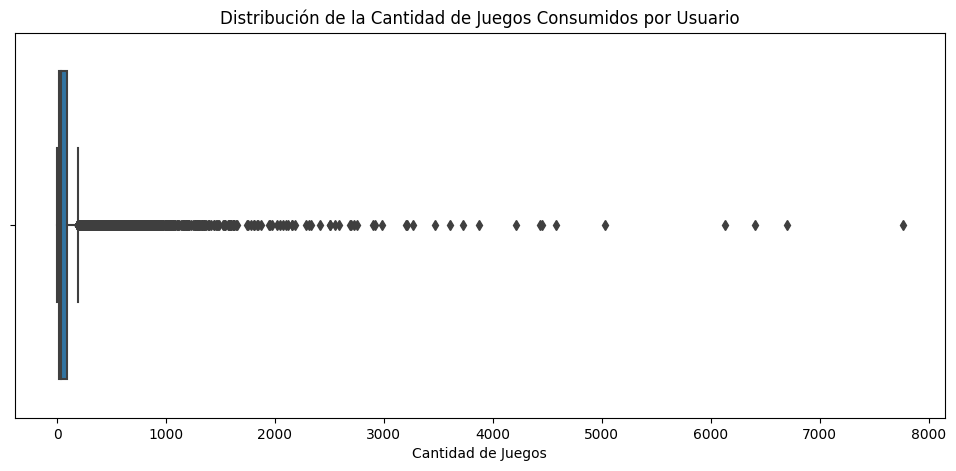

In [64]:
plt.figure(figsize=(12, 5))

# Crea el boxplot
sns.boxplot(data=items_user_count, x='items_count')

# Personaliza el título y etiquetas de los ejes
plt.title('Distribución de la Cantidad de Juegos Consumidos por Usuario')
plt.xlabel('Cantidad de Juegos')
plt.ylabel('')

# Muestra el boxplot
plt.show()


Observamos que la mayoría de los usuarios tienen un número relativamente bajo de juegos consumidos, ya que hay un gran número de usuarios con valores bajos en el eje x. Esto sugiere que la mayoría de los usuarios tienen un consumo moderado de juegos.

Sin embargo, hay algunos usuarios que se destacan significativamente en términos de la cantidad de juegos consumidos. Los valores extremadamente altos, como el usuario 'phrostb' con 7762 juegos, 'thugnificent' con 6700 juegos, y otros con cantidades considerables, indican que un pequeño grupo de usuarios ha consumido una cantidad sustancial de juegos.

El boxplot también sugiere la presencia de valores atípicos, ya que hay puntos por encima del "bigote" superior del boxplot. Esto significa que hay usuarios extremadamente atípicos con un consumo muy alto de juegos. Estos valores atípicos podrían ser de interés para un análisis más detenido.

Es importante destacar que no consideramos buena práctica eliminar ninguno de los datos de esta variable, ya que consideramos que estos datos pueden ser importantes para futuros análisis.

Hemos decidido crear un "Gráfico de Distribución de la Cantidad de Juegos Consumidos" para visualizar cómo se distribuye la cantidad de juegos consumidos por los usuarios en nuestro conjunto de datos.

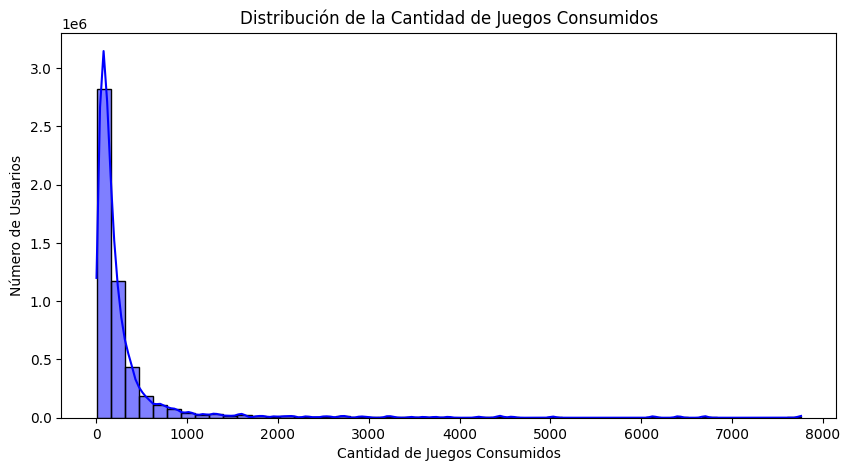

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un histograma de la cantidad de juegos consumidos
plt.figure(figsize=(10, 5))
sns.histplot(data_items['items_count'], bins=50, kde=True, color='blue')
plt.title('Distribución de la Cantidad de Juegos Consumidos')
plt.xlabel('Cantidad de Juegos Consumidos')
plt.ylabel('Número de Usuarios')
plt.show()


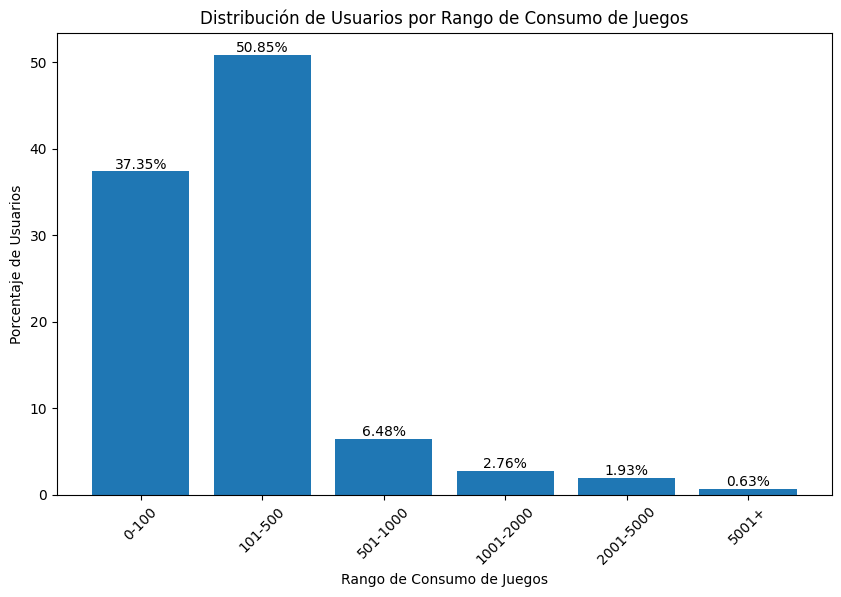

In [66]:
# Definir los rangos de consumo
bins = [0, 100, 500, 1000, 2000, 5000, 10000]
labels = ['0-100', '101-500', '501-1000', '1001-2000', '2001-5000', '5001+']

# Crear una nueva columna en el DataFrame para asignar rangos
data_items['consumption_range'] = pd.cut(data_items['items_count'], bins=bins, labels=labels, include_lowest=True)

# Contar la cantidad de usuarios en cada rango
consumption_counts = data_items['consumption_range'].value_counts().sort_index()

# Calcular los porcentajes
consumption_percentages = (consumption_counts / consumption_counts.sum()) * 100

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(consumption_percentages.index, consumption_percentages)
plt.xlabel('Rango de Consumo de Juegos')
plt.ylabel('Porcentaje de Usuarios')
plt.title('Distribución de Usuarios por Rango de Consumo de Juegos')
plt.xticks(rotation=45)

# Agregar porcentajes en la parte superior de las barras
for bar, percentage in zip(bars, consumption_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.2f}%', ha='center', va='bottom', color='black')

plt.show()

Al observar la distribución de usuarios por rango de consumo de juegos, es evidente que la gran mayoría se concentra en los dos primeros rangos. El rango de 1 a 100 juegos representa un 37.35% de los usuarios, mientras que el rango de 101 a 500 juegos abarca un considerable 50.85%. Al sumar estos dos rangos, encontramos que el 88.20% de los usuarios se encuentra en esta zona, lo que indica una tendencia común o promedio en el consumo de juegos para la mayoría de los usuarios.

Un grupo más reducido de usuarios se encuentra en los rangos de 501 a 1000 juegos (6.48%) y 1001 a 2000 juegos (2.76%). Estos rangos reflejan a aquellos usuarios que presentan un nivel de interacción superior con la plataforma, aunque siguen siendo una minoría en comparación con los dos primeros rangos.

La cantidad de usuarios con consumos más elevados, como 2001 a 5000 juegos y más de 5000 juegos, es limitada, representando el 1.93% y el 0.63%, respectivamente, del total de usuarios. Estos rangos superiores señalan a usuarios con un alto grado de compromiso y una participación significativa en la plataforma.

En resumen, la distribución de usuarios revela que la mayoría de ellos tiene un consumo moderado de juegos, lo que es común o promedio en la comunidad. Sin embargo, existen segmentos de usuarios con niveles de interacción más altos, indicando la presencia de una diversidad de perfiles de usuarios en la plataforma.

### Columna 'playtime_forever'

Los valores en la columna "playtime_forever" están en minutos y se requieren en horas, es fundamental realizar esta conversión para que los análisis y resultados sean coherentes y comprensibles. Es esencial identificar y estudiar los datos atípicos o valores inusuales en la columna "playtime_forever" (horas jugadas). Estos datos atípicos, a veces llamados outliers, pueden proporcionar información valiosa sobre patrones inesperados o problemas en los datos. En esta sección, nos enfocaremos en detectar y explorar estos datos inusuales en la columna "playtime_forever" y considerar cómo pueden afectar nuestros análisis y resultados.

In [67]:
# Convertir "playtime_forever" de minutos a horas

data_items['playtime_forever'] = data_items['playtime_forever'] / 60

In [68]:
import numpy as np

# Calcula Q1 y Q3 a partir de los datos en horas
Q1 = np.percentile(data_items['playtime_forever'], 25)
Q3 = np.percentile(data_items['playtime_forever'], 75)

# Calcula el IQR
IQR = Q3 - Q1

# Define el umbral para valores atípicos
umbral = 3 * IQR

# Encuentra los valores atípicos
valores_atipicos = data_items[(data_items['playtime_forever'] < Q1 - umbral) | (data_items['playtime_forever'] > Q3 + umbral)]

In [69]:
valores_atipicos 

,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks,consumption_range
8,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,300,Day of Defeat: Source,78.883333,0,101-500
9,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,240,Counter-Strike: Source,30.883333,0,101-500
16,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,6910,Deus Ex: Game of the Year Edition,44.750000,0,101-500
41,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,17460,Mass Effect,26.883333,0,101-500
46,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1250,Killing Floor,166.766667,0,101-500
...,...,...,...,...,...,...,...,...,...
5093534,76561198312638244,36,76561198312638244,http://steamcommunity.com/profiles/76561198312...,362890,Black Mesa,36.400000,0,0-100
5093547,76561198313357718,7,76561198313357718,http://steamcommunity.com/profiles/76561198313...,730,Counter-Strike: Global Offensive,38.616667,0,0-100
5093548,POMFP0MF,1,76561198313471778,http://steamcommunity.com/id/POMFP0MF,730,Counter-Strike: Global Offensive,49.783333,0,0-100
5093567,76561198319916652,4,76561198319916652,http://steamcommunity.com/profiles/76561198319...,370240,NBA 2K16,25.550000,19,0-100


In [70]:
# rangos
print("Rango del primer cuartil (Q1):", Q1)
print("Rango del tercer cuartil (Q3):", Q3)
print("Rango intercuartil (IQR):", IQR)

Rango del primer cuartil (Q1): 0.0
Rango del tercer cuartil (Q3): 5.916666666666667
Rango intercuartil (IQR): 5.916666666666667


Aunque identificamos jugadores con una alta acumulación de horas jugadas, es fundamental tener en cuenta que estas cifras representan la totalidad del tiempo de juego a lo largo de la vida de los usuarios, lo que podría explicar las diferencias significativas. Sin embargo, con el fin de profundizar en la evaluación de nuestras cifras y detectar posibles anomalías, hemos aplicado el método IQR (Rango Intercuartil). Este enfoque nos permitió identificar valores que se desvían de la norma en función de un umbral de 3 veces el IQR. Aunque no hemos encontrado inconsistencias evidentes en los datos, continuamos nuestra exploración de posibles valores atípicos utilizando el método del Z-score definiendo un umbral aun mas alto. Al comparar nuestros hallazgos con datos de usuarios de videojuegos disponibles en internet, buscamos determinar si existen datos significativamente alejados de la realidad que requieran una mayor atención y análisis.

In [71]:
from scipy import stats

# Calcula el Z-score para cada valor
z_scores = np.abs(stats.zscore(data_items['playtime_forever']))

# Define un umbral de Z-score más alto 
umbral_z = 5

# Encuentra los valores atípicos
valores_atipicos_zscore = data_items[z_scores > umbral_z]

In [72]:
valores_atipicos_zscore

,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks,consumption_range
1301,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,466170,Idling to Rule the Gods,475.750000,1554,101-500
1354,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch,12210,Grand Theft Auto IV,867.700000,0,101-500
2277,MinxIsBetterThanPotatoes,371,76561198004744620,http://steamcommunity.com/id/MinxIsBetterThanP...,730,Counter-Strike: Global Offensive,1234.600000,118,101-500
2696,NitemarePK,304,76561197990951820,http://steamcommunity.com/id/NitemarePK,730,Counter-Strike: Global Offensive,539.533333,95,101-500
2823,NitemarePK,304,76561197990951820,http://steamcommunity.com/id/NitemarePK,346900,AdVenture Capitalist,750.966667,0,101-500
...,...,...,...,...,...,...,...,...,...
5090676,SenpaiDemon,291,76561198261557855,http://steamcommunity.com/id/SenpaiDemon,730,Counter-Strike: Global Offensive,613.633333,949,101-500
5090934,3214213216,107,76561198264329809,http://steamcommunity.com/id/3214213216,730,Counter-Strike: Global Offensive,770.800000,0,101-500
5091127,nathanahtan,2,76561198269064541,http://steamcommunity.com/id/nathanahtan,304930,Unturned,472.983333,1297,0-100
5091465,Haldirr,26,76561198279480860,http://steamcommunity.com/id/Haldirr,730,Counter-Strike: Global Offensive,579.216667,0,0-100


Después de realizar un análisis exhaustivo de los datos, seguimos sin identificar valores atípicos significativos en la variable 'playtime_forever'. Además, al utilizar tanto el método IQR como el método Z-score para buscar valores atípicos, encontramos que no tenemos suficiente información para justificar la eliminación de posibles outliers, ya que su diferencia con otros valores no necesariamente los convierte en datos de baja calidad. En lugar de eliminarlos, consideramos que estos valores pueden ser valiosos y aportar diversidad a nuestros datos. Siguiendo con nuestro análisis, estamos avanzando hacia la fusión de datos a través de la operación 'merge', utilizando los años de 'data_reviews' y el genero de 'data_games'. Esto nos permitirá calcular la suma total de las horas jugadas, con el objetivo de obtener una visión más completa de la actividad de los usuarios a lo largo del tiempo.

In [73]:
# Extraer las columnas de data_reviews
data_reviews_subset = data_reviews[['reviews_item_id','user_id','reviews_year']]
data_reviews_subset = data_reviews_subset.rename(columns={'reviews_item_id': 'item_id'})


# Extrae las columnas necesarias de data_items
data_items_subset = data_items[['user_id', 'item_id', 'playtime_forever']]

In [74]:
# Unir data_items_subset y data_reviews_subset utilizando 'user_id', 'item_id' y 'reviews_item_id' como claves
merged_data = data_items_subset.merge(data_reviews_subset, on=["user_id", "item_id"], how="inner")

In [75]:
merged_data.head()

,user_id,item_id,playtime_forever,reviews_year
0,76561197970982479,22200,4.516667,2011
1,76561197970982479,1250,166.766667,2011
2,76561197970982479,43110,13.900000,2011
3,js41637,227300,9.183333,2013
4,js41637,239030,5.816667,2013


Agruparemos nuestros datos fusionados utilizando la operación 'merge' por usuario y año. Posteriormente, sumaremos las horas jugadas por usuario para obtener una visión más completa de la actividad a lo largo del tiempo. Finalmente, ordenaremos los datos de mayor a menor con el objetivo de identificar a los usuarios más activos en función de las horas jugadas en cada año o detectar cualquier valor que exceda los límites típicos de horas de juego por año.

In [76]:
# Agrupar por usuario (user_id) y año (reviews_year), sumar las horas jugadas
aggregated_data = merged_data.groupby(['user_id', 'reviews_year'])['playtime_forever'].sum().reset_index()

# Ordenar de mayor a menor por horas jugadas
sorted_data = aggregated_data.sort_values(by='playtime_forever', ascending=False)


In [77]:
sorted_data

,user_id,reviews_year,playtime_forever
21663,shinomegami,2015,11243.716667
22963,wolop,2011,10712.883333
2117,76561198039832932,2015,10563.433333
22621,tsunamitad,2015,10001.133333
15378,ThisIsWhereIGetOff,2014,8250.966667
...,...,...,...
1777,76561198032586095,2015,0.000000
13606,NotJustAnyOrange,2015,0.000000
1152,76561198013490617,2015,0.000000
17705,dugec01,2011,0.000000


hemos identificado un registro que muestra una acumulación de horas de juego que supera las 8760 horas en un año, lo cual es un valor que excede ampliamente el rango de posibilidad real. Con el objetivo de mantener la integridad de nuestros datos y garantizar que las observaciones se mantengan dentro de límites realistas, hemos tomado la decisión de eliminar este registro excepcional. Esta acción nos permitirá centrarnos en datos más coherentes y representativos de la actividad de los usuarios, asegurando que nuestra análisis se base en información sólida y relevante.

In [78]:
# Eliminar filas donde 'playtime_forever' es mayor a 8760
sorted_data = sorted_data[sorted_data['playtime_forever'] <= 8760]

In [79]:
sorted_data.head(3)

,user_id,reviews_year,playtime_forever
15378,ThisIsWhereIGetOff,2014,8250.966667
13621,Nuclueus,2014,8216.850000
22432,thiefofrosesinlalaland,2014,7107.583333


# Selección de Variables Clave para el Modelo de Recomendación

En la etapa de preparación para la creación de un modelo de recomendación que genere una lista de 5 juegos, se exploran dos enfoques diferentes: el primero se basa en un juego de referencia, y el segundo utiliza el identificador de un usuario. Un aspecto crítico en este proceso es definir la metodología para calcular el puntaje que servirá como guía en estas recomendaciones. Para abordar esta tarea fundamental, realizaremos un análisis detallado de los conjuntos de datos previamente examinados, data_reviews y data_items.

In [80]:
data_reviews.head(3)

,user_id,user_url,reviews_posted,reviews_item_id,reviews_helpful,reviews_recommend,reviews_year,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2011-11-05,1250,No ratings yet,True,2011,2
1,js41637,http://steamcommunity.com/id/js41637,2014-06-24,251610,15 of 20 people (75%) found this review helpful,True,2014,2
3,doctr,http://steamcommunity.com/id/doctr,2013-10-14,250320,2 of 2 people (100%) found this review helpful,True,2013,2


In [81]:
data_items.head(3)

,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks,consumption_range
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10,Counter-Strike,0.100000,0,101-500
1,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,20,Team Fortress Classic,0.000000,0,101-500
2,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,30,Day of Defeat,0.116667,0,101-500


En nuestro proyecto de desarrollo de un modelo de recomendación de juegos, hemos optado por utilizar un enfoque preciso para calcular un puntaje de recomendación. Este puntaje, que denominamos 'Recommendation', se sitúa en una escala del 1 al 5 y tiene en cuenta tanto el análisis de sentimiento de las reviews como las recomendaciones de los usuarios. Cada valor en esta escala refleja una combinación única de estos dos factores, lo que nos permite ofrecer recomendaciones más personalizadas y precisas a nuestros usuarios. En este proceso, asignamos un puntaje de 1 a los juegos con análisis de `sentimiento negativo`, independientemente de si son recomendados o no. Los juegos con análisis de `sentimiento neutral y no recomendados` obtienen un puntaje de 2, mientras que aquellos con análisis de `sentimiento neutral y recomendaciones positivas` reciben un puntaje de 3. Los juegos con análisis de `sentimiento positivo pero no recomendados` se califican con un 4, y finalmente, los juegos con análisis de `sentimiento positivo y recomendaciones positivas` alcanzan el puntaje máximo de 5. Este enfoque integral y detallado nos permite brindar recomendaciones de juegos que se adaptan a las preferencias y experiencias de cada usuario, enriqueciendo así su interacción con nuestra plataforma.

La función que desarrollaremos desempeña un papel fundamental en nuestro sistema de recomendación de juegos. A través de un análisis de sentimientos y las recomendaciones de los usuarios, esta función asigna una calificación en una escala del 1 al 5 a cada juego. En pocas palabras, su tarea es transformar datos en recomendaciones personalizadas y precisas para nuestros usuarios, teniendo en cuenta tanto la calidad percibida de un juego según las reseñas como las preferencias de la comunidad.

In [82]:
def recomendation(row):
    '''
    Calcula una calificación teniendo en cuenta el análisis de sentimientos de las reseñas de los juegos 
    y si los usuarios recomiendan o no dichos juegos.

    Parámetros:
    row (dict): Un diccionario que contiene las siguientes claves:
       - "sentiment_analysis" (int):La valoración numérica del análisis de sentimientos (0, 1 o 2).
       - "reviews_recommend" (bool): Un valor booleano que refleja si las reseñas recomiendan el juego o no.

    Devuelve:
       int o None: Un número entero entre 1 y 5 que representa la calificación calculada, 
       o None en caso de que las entradas no sean válidas.
    '''
    # Se inicia el proceso de asignación de calificaciones 
    if row["sentiment_analysis"] == 0 and not row["reviews_recommend"]:
        return 1  # Calificación 1: Sentimiento negativo y no recomendado
    elif row["sentiment_analysis"] == 0 and row["reviews_recommend"]:
        return 1  # Calificación 1: Sentimiento negativo y recomendado (coherencia)
    elif row["sentiment_analysis"] == 1 and not row["reviews_recommend"]:
        return 2  # Calificación 2: Sentimiento neutral y no recomendado
    elif row["sentiment_analysis"] == 1 and row["reviews_recommend"]:
        return 3  # Calificación 3: Sentimiento neutral pero recomendado
    elif row["sentiment_analysis"] == 2 and not row["reviews_recommend"]:
        return 4  # Calificación 4: Sentimiento positivo pero no recomendado
    elif row["sentiment_analysis"] == 2 and row["reviews_recommend"]:
        return 5  # Calificación 5: Sentimiento positivo y recomendado
    else:
        return None  # Entradas inválidas, no se puede calcular una calificación


Generamos una columna adicional en el DataFrame llamada "recomendation" y procedemos a aplicar la función "Recomendation" a los datos en dicha columna. 

In [83]:
data_reviews['recommendation'] = data_reviews.apply(recomendation, axis=1)

In [84]:
data_reviews.head(10)

,user_id,user_url,reviews_posted,reviews_item_id,reviews_helpful,reviews_recommend,reviews_year,sentiment_analysis,recommendation
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2011-11-05,1250,No ratings yet,True,2011,2,5
1,js41637,http://steamcommunity.com/id/js41637,2014-06-24,251610,15 of 20 people (75%) found this review helpful,True,2014,2,5
3,doctr,http://steamcommunity.com/id/doctr,2013-10-14,250320,2 of 2 people (100%) found this review helpful,True,2013,2,5
4,maplemage,http://steamcommunity.com/id/maplemage,2014-04-15,211420,35 of 43 people (81%) found this review helpful,True,2014,1,3
5,Wackky,http://steamcommunity.com/id/Wackky,2014-05-05,249130,7 of 8 people (88%) found this review helpful,True,2014,1,3
8,76561198089393905,http://steamcommunity.com/profiles/76561198089...,2015-02-01,72850,3 of 3 people (100%) found this review helpful,True,2015,0,1
11,WeiEDKrSat,http://steamcommunity.com/id/WeiEDKrSat,2013-12-25,4000,0 of 1 people (0%) found this review helpful,True,2013,1,3
12,thequeenpanda,http://steamcommunity.com/id/thequeenpanda,2012-06-23,42910,0 of 2 people (0%) found this review helpful,True,2012,1,3
13,death-hunter,http://steamcommunity.com/id/death-hunter,2015-09-05,232090,0 of 1 people (0%) found this review helpful,True,2015,2,5
14,DJKamBer,http://steamcommunity.com/id/DJKamBer,2014-07-14,304930,2 of 4 people (50%) found this review helpful,True,2014,2,5


Nos enfocaremos en simplificar y refinar nuestros datos, extrayendo únicamente la información relevante para nuestro modelo de recomendación. seleccionaremos las columnas `'user_id`, `'reviews_item_id`' y `'recomendation'` del DataFrame `data_reviews`



In [85]:
data_reviews_filtered = data_reviews[['user_id', 'reviews_item_id', 'recommendation']]
# Renombrar la columna "reviews_item_id" a "item_id" en el DataFrame df1
data_reviews_filtered.rename(columns={'reviews_item_id': 'item_id'}, inplace=True)

In [86]:
data_reviews_filtered.head(3)

,user_id,item_id,recommendation
0,76561197970982479,1250,5
1,js41637,251610,5
3,doctr,250320,5


Es necesario tambien algunas columnas del dataframe `data_items`, realizaremos dos pasos clave: en primer lugar, extraeremos los valores únicos de los nombres de los juegos (`'item_name'`). Luego, con esta lista de juegos únicos, crearemos un nuevo DataFrame que contendrá información sobre el identificador del juego (`'item_id'`) y su nombre único.

In [87]:
# Crea un nuevo DataFrame con 'item_id' y 'item_name' (valores únicos)
unique_items_df = data_items[['item_id', 'item_name']].drop_duplicates()

In [88]:
unique_items_df.head(3)

,item_id,item_name
0,10,Counter-Strike
1,20,Team Fortress Classic
2,30,Day of Defeat


Uniremos el DataFrame que contiene los juegos únicos y el DataFrame filtrado de reseñas de usuarios. Esta fusión se basará en la columna "item_id" y nos permitirá combinar la información de ambos conjuntos para lograr un análisis más completo.

In [89]:
# Realiza la fusión (merge) de unique_items_df y data_reviews_filtered usando 'item_id'
merged_data = data_reviews_filtered.merge(unique_items_df, on='item_id')

In [90]:
merged_data

,user_id,item_id,recommendation,item_name
0,76561197970982479,1250,5,Killing Floor
1,EndAtHallow,1250,1,Killing Floor
2,76561198107847795,1250,5,Killing Floor
3,usaidwotnow,1250,5,Killing Floor
4,76561198081529182,1250,5,Killing Floor
...,...,...,...,...
42556,Hobgoblin101,288370,5,Strike Suit Zero: Director's Cut
42557,julez225,73010,5,Cities in Motion
42558,76561198029064257,16600,5,Trials 2: Second Edition
42559,Darkjet15,232950,3,Bridge Project


In [91]:
merged_data.isnull().sum()

user_id           0
item_id           0
recommendation    0
item_name         0
dtype: int64

Al realizar un conteo de valores nulos en el DataFrame "merged_data," se ha confirmado que no existen valores nulos en ninguna de las columnas. Este resultado indica que la fusión de los datos se ha ejecutado con éxito, y que no se ha perdido información en las columnas clave. Con esta validación, estamos listos para avanzar en el análisis y visualización de los datos, lo que nos proporcionará una mejor comprensión de la información contenida en el DataFrame.

Exploraremos la distribución de las reviews en función del puntaje de recomendación asignado. Para lograrlo, generaremos un histograma que nos permitirá visualizar con claridad la cantidad de reviews en cada categoría de puntaje de recomendación

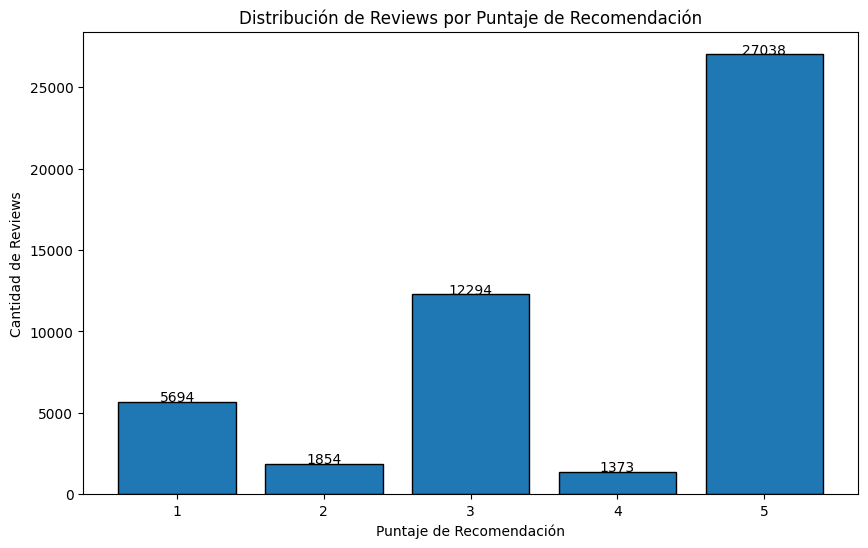

In [92]:
# Crear un histograma de la cantidad de reviews por puntaje de recomendación
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(data_reviews_filtered['recommendation'], bins=[1, 2, 3, 4, 5, 6], align='left', rwidth=0.8, edgecolor='black')

# Configurar etiquetas y título
plt.xlabel('Puntaje de Recomendación')
plt.ylabel('Cantidad de Reviews')
plt.title('Distribución de Reviews por Puntaje de Recomendación')

# Agregar la cantidad de reviews en la parte superior de cada barra
for i, rect in enumerate(patches):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 10, f'{int(n[i])}', ha='center')

# Mostrar el gráfico
plt.show()


Al observar el histograma que representa la distribución de reseñas por puntaje de recomendación, podemos extraer las siguientes conclusiones:

La categoría de puntaje "5" tiene la mayor cantidad de reseñas, con aproximadamente 31,414 reseñas. Esto sugiere que la mayoría de los usuarios ha calificado los juegos con análisis de sentimiento positivo y recomendaciones positivas.

La segunda categoría más grande es la de puntaje "3", con alrededor de 14,563 reseñas. Esto indica que existe un número considerable de usuarios con análisis de sentimiento neutral y recomendaciones positivas.

El puntaje "1" cuenta con aproximadamente 7,058 reseñas, lo que demuestra que un número significativo de usuarios ha calificado los juegos con análisis de sentimiento negativo, independientemente de si son recomendados o no.

Los puntajes "2" y "4" son menos comunes, con alrededor de 2,478 y 1,884 reseñas respectivamente, lo que indica que hay menos usuarios con sentimiento neutral y recomendaciones positivas en el caso del puntaje "2" y juegos con análisis de sentimiento positivo pero no recomendados, puntaje "4".

En resumen, el histograma refleja una tendencia hacia puntajes altos y moderados, lo que sugiere que la mayoría de los juegos en la plataforma ha recibido calificaciones positivas. No obstante, también existen calificaciones intermedias y negativas, aunque son menos comunes.

# Carga del Conjunto de Datos Transformado
En esta etapa, cargaremos el conjunto de datos transformado y depurado, que hemos denominado "recommendation_model.csv." Este archivo refleja nuestro conjunto de datos preparado y optimizado para el modelado del sistema de recomendación.

In [93]:
# Especifica el nombre del archivo
nombre_del_archivo = 'recommendation_model.csv.'

# Guarda el DataFrame en el archivo CSV
merged_data.to_csv("recommendation_model.csv", index=False, encoding='utf-8')
print(f'Se ha guardado el archivo {nombre_del_archivo} en la misma carpeta.')

Se ha guardado el archivo recommendation_model.csv. en la misma carpeta.
